In [1]:
#------------- Shor's Algorithm ------------------#
# The easiest method to use the Shor's algorithm is to use the Shor class in aqua. 
# Although aqua is deprecated, I use aqua for the sake of ease. 
# Import all the necessary. 
# These are all the things that will run the experiment
from qiskit.aqua.algorithms import Shor 
from qiskit.aqua import QuantumInstance
import numpy as np
import pandas as pd
from math import gcd
from fractions import Fraction
from numpy.random import randint
from qiskit import QuantumCircuit,Aer, execute ,transpile, assemble
from qiskit.tools.visualization import plot_histogram
import matplotlib as plt
print("All imports Successful")


All imports Successful


/Users/pranishbhagat/opt/anaconda3/envs/cwq/lib/python3.9/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


In [2]:
# Setup the backend and the instances to run the experiment. 
# For this project, I am going to factorize 15. This is a really easy example but shows 
# the power of Shor's Algorithm.
backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots = 1000)
my_Shor1 = Shor(N=15, a = 2, quantum_instance = quantum_instance)
# my_Shor2 = Shor(N=25, a = 2, quantum_instance = quantum_instance)
# my_Shor3 = Shor(N=55, a = 13, quantum_instance = quantum_instance)
print("Setup successful")

/Users/pranishbhagat/opt/anaconda3/envs/cwq/lib/python3.9/site-packages/qiskit/aqua/quantum_instance.py:135: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_class('aqua.QuantumInstance',


Setup successful


/Users/pranishbhagat/opt/anaconda3/envs/cwq/lib/python3.9/site-packages/qiskit/aqua/algorithms/factorizers/shor.py:69: DeprecationWarning: The package qiskit.aqua.algorithms.factorizers is deprecated. It was moved/refactored to qiskit.algorithms.factorizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua.algorithms.factorizers',


In [3]:
Shor.run(my_Shor1)

{'factors': [[3, 5]], 'total_counts': 64, 'successful_counts': 18}

In [4]:
# Let's take a look at how the algorithm works 
# Shor's algorithm can be broken down into three parts.
# this part also explained in the report
    # Number one(Modular Exponentiation Function): We can convert the factoring problem into a 
    # period finding probelm usign what's called the 
    # Modular Exponentiation Function.
    # What this boils down to is dividing our number by guest nunber 'a' and computing the remainder.
    # For good guesses of a, this function is periodic as we increase the power of a.
    # Number two (Quantum Fourier Transform): The second part finds the period of the modular exponentiation 
    # function using the Quantum Fourier Transform and this is responsible for the quantum speedup of this algorithm.
    # Number three (Compute factors of original number): Once we found the period of our modular exponentiation function, 
    # we can use this number to essentially compute the factors of our original numbe usign the magic formualr[explained in the report]
    
# magic numbers: 
# a = guess number
# r = period of modular exponentiation function.
# N = number to factor
# p = a^(r/2) - 1 
# q = a^(r/2) + 1
# These two numbers p and q are not essentially the factors of N that we're looking for, but with high probability, they'll
# have co-factors  with N which we can compute efficiently.

In [5]:
# Code for modular exponentiation function. This is hardcoded for 15 and a guess number.
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate() # this is the final gate that will be useful for measurement
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U
            
            

In [6]:
# specify that we have 8 qubits. 
n_count = 7
a = 7

In [7]:
# define the quantum fourier transform circuit. 
def qft_dagger(n):
    qc = QuantumCircuit(n) # the circuit takes n qubits. 
    for qubit in range(n//2):
        qc.swap(qubit,n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cu1(-np.pi/float(2**(j-m)),m,j)
        qc.h(j)
    qc.name="QFT dagger"
    return qc

In [8]:
qc = QuantumCircuit(n_count + 4, n_count)

for q in range(n_count):
    qc.h(q)

    qc.x(3+n_count)

for q in range(n_count):
        qc.append(c_amod15(a,2**q),[q]+[i+n_count for i in range(4)])

qc.append(qft_dagger(n_count),range(n_count))
qc.measure(range(n_count),range(n_count))
qc.draw('text')

#  print("Successful")

<ipython-input-7-3c8e5fc3eb9e>:8: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qc.cu1(-np.pi/float(2**(j-m)),m,j)


┌───┐                                                            »
 q_0: ┤ H ├─────────────────────────────────────■──────────────────────»
      ├───┤                                     │                      »
 q_1: ┤ H ├─────────────────────────────────────┼──────────────■───────»
      ├───┤                                     │              │       »
 q_2: ┤ H ├─────────────────────────────────────┼──────────────┼───────»
      ├───┤                                     │              │       »
 q_3: ┤ H ├─────────────────────────────────────┼──────────────┼───────»
      ├───┤                                     │              │       »
 q_4: ┤ H ├─────────────────────────────────────┼──────────────┼───────»
      ├───┤                                     │              │       »
 q_5: ┤ H ├─────────────────────────────────────┼──────────────┼───────»
      ├───┤                                     │              │       »
 q_6: ┤ H ├─────────────────────────────────────┼──────────────┼───────»
      └───┘                              ┌──────┴──────┐┌──────┴──────┐»
 q_7: ───────────────────────────────────┤0            ├┤0            ├»
                                         │             ││             │»
 q_8: ───────────────────────────────────┤1            ├┤1            ├»
                                         │  7^1 mod 15 ││  7^2 mod 15 │»
 q_9: ───────────────────────────────────┤2            ├┤2            ├»
      ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐│             ││             │»
q_10: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤3            ├┤3            ├»
      └───┘└───┘└───┘└───┘└───┘└───┘└───┘└─────────────┘└─────────────┘»
 c: 7/═════════════════════════════════════════════════════════════════»
                                                                       »
«                                                                    »
« q_0: ──────────────────────────────────────────────────────────────»
«                                                                    »
« q_1: ──────────────────────────────────────────────────────────────»
«                                                                    »
« q_2: ───────■──────────────────────────────────────────────────────»
«             │                                                      »
« q_3: ───────┼──────────────■───────────────────────────────────────»
«             │              │                                       »
« q_4: ───────┼──────────────┼──────────────■────────────────────────»
«             │              │              │                        »
« q_5: ───────┼──────────────┼──────────────┼───────────────■────────»
«             │              │              │               │        »
« q_6: ───────┼──────────────┼──────────────┼───────────────┼────────»
«      ┌──────┴──────┐┌──────┴──────┐┌──────┴───────┐┌──────┴───────┐»
« q_7: ┤0            ├┤0            ├┤0             ├┤0             ├»
«      │             ││             ││              ││              │»
« q_8: ┤1            ├┤1            ├┤1             ├┤1             ├»
«      │  7^4 mod 15 ││  7^8 mod 15 ││  7^16 mod 15 ││  7^32 mod 15 │»
« q_9: ┤2            ├┤2            ├┤2             ├┤2             ├»
«      │             ││             ││              ││              │»
«q_10: ┤3            ├┤3            ├┤3             ├┤3             ├»
«      └─────────────┘└─────────────┘└──────────────┘└──────────────┘»
« c: 7/══════════════════════════════════════════════════════════════»
«                                                                    »
«                      ┌─────────────┐┌─┐                  
« q_0: ────────────────┤0            ├┤M├──────────────────
«                      │             │└╥┘┌─┐               
« q_1: ────────────────┤1            ├─╫─┤M├───────────────
«                      │             │ ║ └╥┘┌─┐            
« q_2: ────────────────┤2            ├─╫──╫─┤M├────────────
«                      │             │ ║  ║ └╥

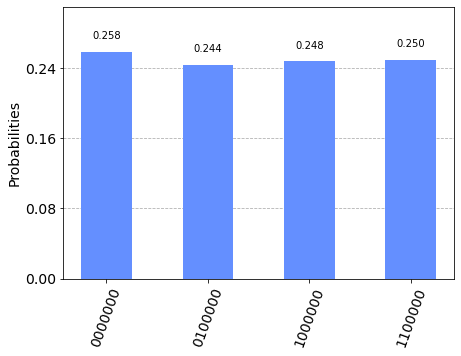

In [9]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc,backend, shots = 2048).result()
counts = results.get_counts()
plot_histogram(counts)

In [10]:
# # This gives us 3 guesses for r. r = 1,2,4
# # r = 4 
# # p = a^(r/2) - 1 
# # q = a^(r/2) + 1 
# #here, a = 7 
# # which gives: 
# # p = 48 , q = 50
# r = 4
# p_ess = a**(r/2) -1 
# q_ess= a**(r/2) + 1

In [11]:
# def computeGCD(x, y):
  
#     if x > y:
#         small = y
#     else:
#         small = x
#     for i in range(1, small+1):
#         if((x % i == 0) and (y % i == 0)):
#             gcd = i
              
#     return gcd


# p = computeGCD(p_ess, N)
# q = computeGCD(q_ess, N)

In [12]:
N = 15

In [13]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", 
                 f"{decimal}/{2**n_count} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

           Register Output          Phase
0  1000000(bin) =  64(dec)  64/128 = 0.50
1  0000000(bin) =   0(dec)   0/128 = 0.00
2  1100000(bin) =  96(dec)  96/128 = 0.75
3  0100000(bin) =  32(dec)  32/128 = 0.25


In [14]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.50      1/2            2
1   0.00      0/1            1
2   0.75      3/4            4
3   0.25      1/4            4


In [15]:
N = 15

In [16]:
np.random.seed(1) # This is to make sure we get reproduceable results
a = randint(2, 15)
print(a)

7


In [17]:
from math import gcd # greatest common divisor
gcd(a, N)

1

In [18]:
def qpe_amod15(a):
    n_count = 8
    qc = QuantumCircuit(4+n_count, n_count)
    for q in range(n_count):
        qc.h(q)     # Initialize counting qubits in state |+>
    qc.x(3+n_count) # And auxiliary register in state |1>
    for q in range(n_count): # Do controlled-U operations
        qc.append(c_amod15(a, 2**q), 
                 [q] + [i+n_count for i in range(4)])
    qc.append(qft_dagger(n_count), range(n_count)) # Do inverse-QFT
    qc.measure(range(n_count), range(n_count))
    # Simulate Results
    aer_sim = Aer.get_backend('aer_simulator')
    # Setting memory=True below allows us to see a list of each sequential reading
    t_qc = transpile(qc, aer_sim)
    qobj = assemble(t_qc, shots=1)
    result = aer_sim.run(qobj, memory=True).result()
    readings = result.get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**n_count)
    print("Corresponding Phase: %f" % phase)
    return phase

In [19]:
phase = qpe_amod15(a) # Phase = s/r
Fraction(phase).limit_denominator(15) # Denominator should (hopefully!) tell us r

Register Reading: 01000000
Corresponding Phase: 0.250000


Fraction(1, 4)

In [20]:
frac = Fraction(phase).limit_denominator(15)
s, r = frac.numerator, frac.denominator
print(r)

4


In [21]:
guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
print(guesses)

[3, 5]


In [22]:
# an example to calculate the factors of 21 using Shor's Algorithm. 
# Here, I have used the inbuilt function from Qiskit to demonstrate the algorithm
from qiskit import IBMQ
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Shor

IBMQ.enable_account('adee1129f593343a280e6b4fbed47413d403c2851d81cb324ec7b845fa816f7ae26d8730b18bc67c6b01e47bcca41e42efa884ea17fec0a6460fd735f4e34980') # Enter your API token here
provider = IBMQ.get_provider(hub='ibm-q')

backend = provider.get_backend('ibmq_qasm_simulator') # Specifies the quantum device

print('\n Shors Algorithm')
print('--------------------')
print('\nExecuting...\n')

factors = Shor(21) #Function to run Shor's algorithm where 21 is the integer to be factored

result_dict = factors.run(QuantumInstance(backend, shots=1, skip_qobj_validation=False))
result = result_dict['factors'] # Get factors from results

print(result)



 Shors Algorithm
--------------------

Executing...



/Users/pranishbhagat/opt/anaconda3/envs/cwq/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqbackend.py:906: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name,


[]
